In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("UberDataset.csv")
print(dataset.head())

         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


In [4]:
dataset.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
dataset.shape

(1156, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [8]:
# Dealing with Missing Value
dataset['PURPOSE'].fillna("NOT", inplace=True)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# Change the Format of Time and Date
dataset['START_DATE'] = pd.to_datetime(dataset["START_DATE"], errors = "coerce")

dataset['END_DATE'] = pd.to_datetime(dataset["END_DATE"], errors = "coerce")

#"Agar koi value convert nahi ho pa rahi hai, toh usse NaN (Not a Number) bana do — error mat do."


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [13]:
# Create two more Columns
from datetime import datetime

dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE']).hour


In [14]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
dataset['Day-Night'] = pd.cut(x=dataset['Time'], bins=[0,10,15,19,24], labels=['Morning','Afternoon','Evening','Night'])

#pd.cut() ka matlab hota hai:
# “Numerical values ko range-wise group karna — jaise marks ko 'Fail', 'Pass', 'Excellent' mein divide karna.”
# Yeh kaam aap manually bhi kar sakte ho, lekin pd.cut() se easily ho jaata hai.
# x: Column ya array jise categorize karna hai.
# bins: Value ranges (list form mein) — yaani categories banane ke cutoff points.
# labels: Har range ka naam — jo naya column ke andar dikhaya jaayega.

In [16]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [17]:
dataset.dropna(inplace=True)

In [18]:
dataset.shape

(413, 10)

## Data Visualization

<Axes: xlabel='count', ylabel='CATEGORY'>

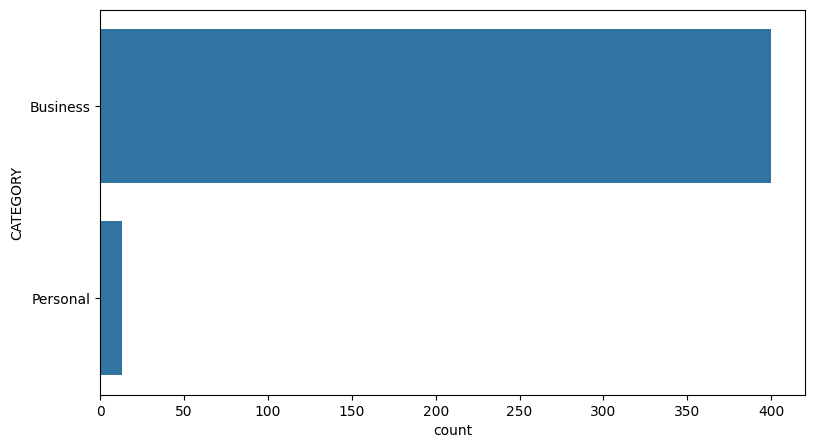

In [ ]:
#Q. In which category do people book the most Uber Rides?
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])

<Axes: xlabel='count', ylabel='PURPOSE'>

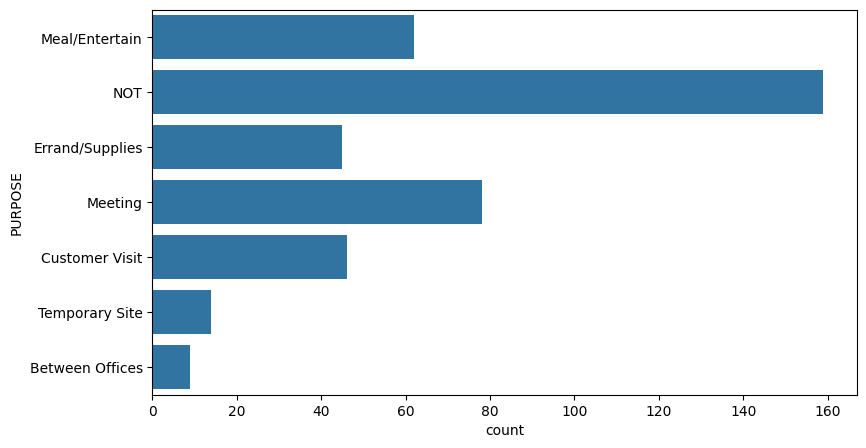

In [ ]:
#Q.For Which purpose do people book Uber rides Most?
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(dataset['PURPOSE'])

<Axes: xlabel='count', ylabel='Day-Night'>

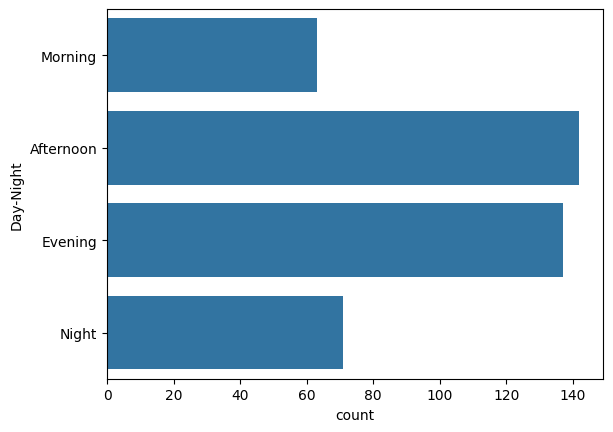

In [ ]:
#Q. At What Time do Most people Book Uber Rides?
sns.countplot(dataset['Day-Night'])

In [26]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [29]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {
    1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar',
    4.0: 'Apr', 5.0: 'May', 6.0: 'Jun',
    7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep',
    10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'
}
dataset['MONTH']  = dataset.MONTH.map(month_label)
mon = dataset.MONTH.value_counts(sort=False)

In [30]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'Value Count')]

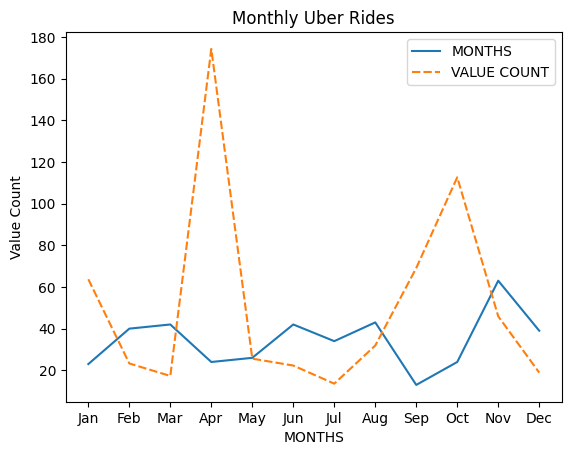

In [32]:
#Q.In which month do people book Uber rides less frequently?
df = pd.DataFrame({
    'MONTHS':mon.values,
    'VALUE COUNT':dataset.groupby('MONTH', sort=False)['MILES'].max()
})
p = sns.lineplot(data=df)
plt.title('Monthly Uber Rides')
p.set(xlabel="MONTHS", ylabel="Value Count")

In [33]:
dataset['DAY'] = dataset.START_DATE.dt.weekday

day_label = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
dataset['DAY'] = dataset["DAY"].map(day_label)

In [34]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


Text(0, 0.5, 'Number of Rides')

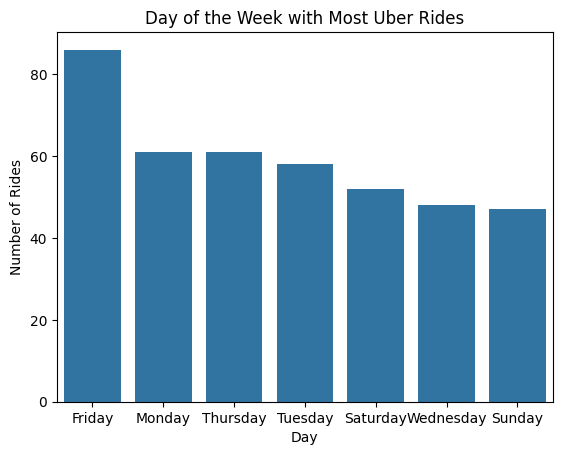

In [35]:
#Q. In which Day The Most Uber Rides Booked?
day_label = dataset.DAY.value_counts()

sns.barplot(x=day_label.index, y=day_label)
plt.title('Day of the Week with Most Uber Rides')
plt.xlabel('Day')
plt.ylabel('Number of Rides')

<Axes: ylabel='MILES'>

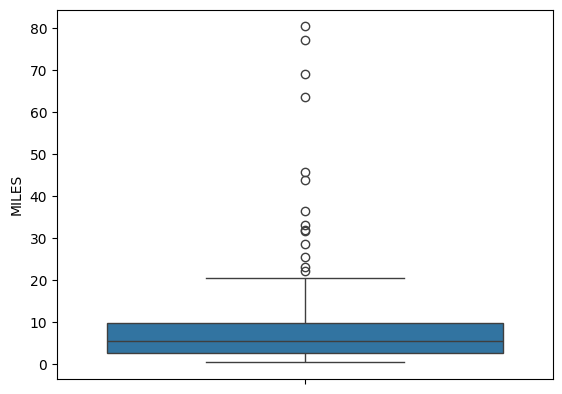

In [36]:
sns.boxplot(dataset[dataset['MILES'] < 100]['MILES'])

<Axes: ylabel='MILES'>

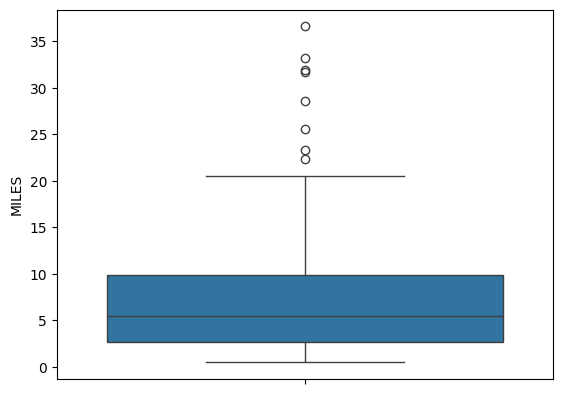

In [37]:
sns.boxplot(dataset[dataset['MILES'] < 40]['MILES'])

C:\Users\xa03a\AppData\Local\Temp\ipykernel_19476\2227296106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

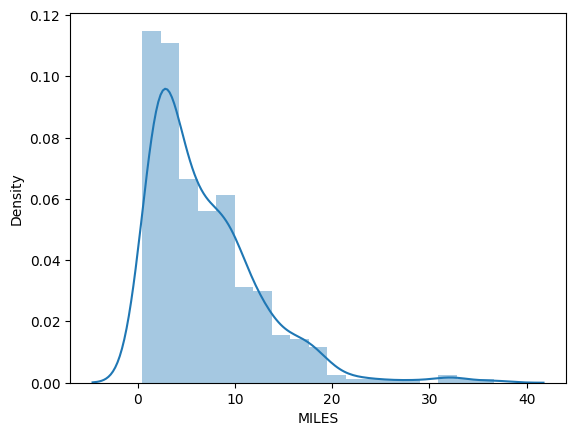

In [ ]:
#Q.How many miles do people usually book cab?
sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])

## Uber Dataset Analysis – Conclusion
<!-- Day-wise Ride Frequency:

The bar plot of rides by day suggests that certain weekdays (most likely Friday or Monday, depending on actual bar heights) have the highest number of Uber bookings.

This pattern indicates a rise in commuting needs during workdays.

Trip Distance Patterns:

From the boxplots and distribution plots:

Most trips are short-distance.

A significant number of rides are under 40 miles, with the most common distances clustering below 10–15 miles.

Very few long-distance rides (above 100 miles) occur, suggesting Uber is predominantly used for local/urban transport.

Outlier Detection:

Boxplots revealed outliers in distance traveled (some very high values), which were visually filtered for better analysis. -->

In [ ]:
# Uber Dataset Analysis – Conclusion
# Day-wise Ride Frequency:

# The bar plot of rides by day suggests that certain weekdays (most likely Friday or Monday, depending on actual bar heights) have the highest number of Uber bookings.

# This pattern indicates a rise in commuting needs during workdays.

# Trip Distance Patterns:

# From the boxplots and distribution plots:

# Most trips are short-distance.

# A significant number of rides are under 40 miles, with the most common distances clustering below 10–15 miles.

# Very few long-distance rides (above 100 miles) occur, suggesting Uber is predominantly used for local/urban transport.

# Outlier Detection:

# Boxplots revealed outliers in distance traveled (some very high values), which were visually filtered for better analysis.These outliers are likely long-distance trips or misclassified data points.